In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings("ignore")
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
X_train.shape

(50000, 32, 32, 3)

In [3]:
 y_train.shape

(50000, 1)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

[9]


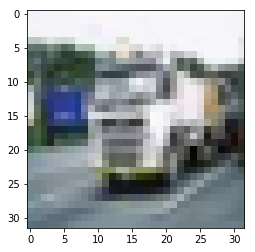

In [6]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])

50000


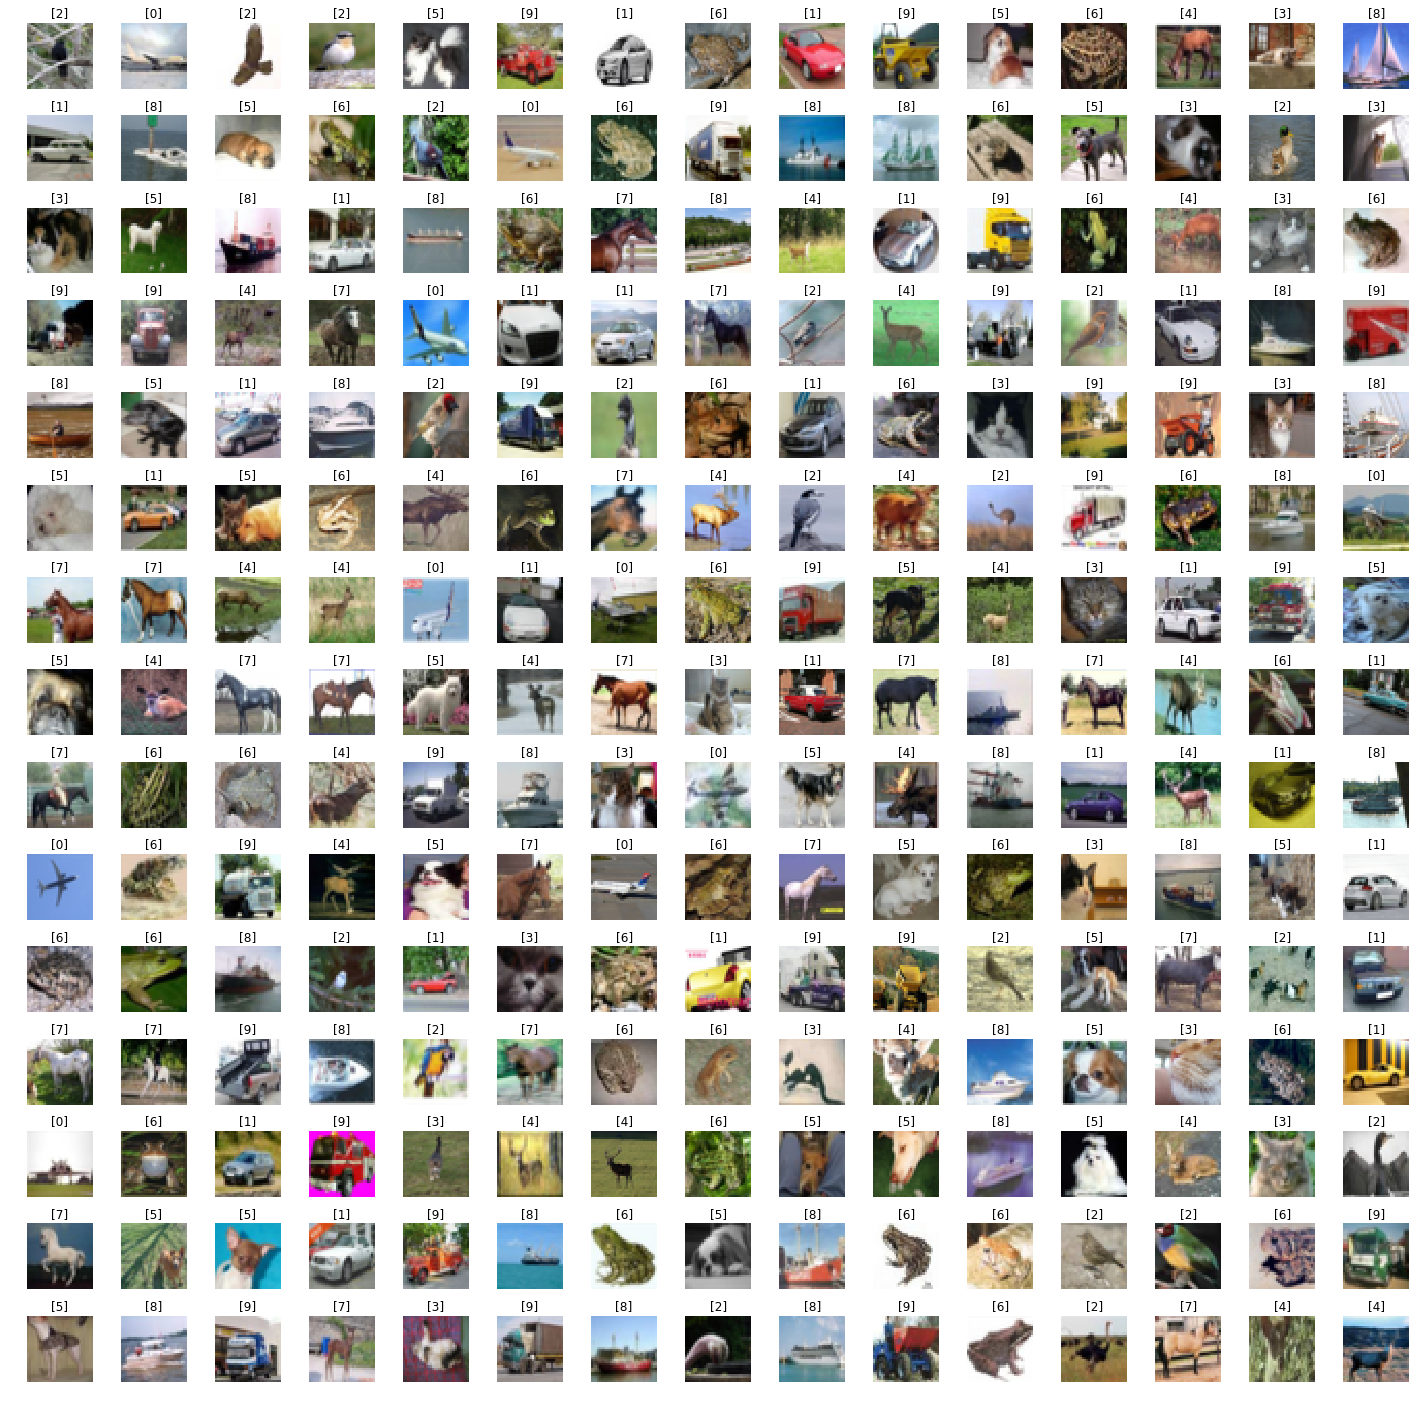

In [7]:
w_grid =15
l_grid =15

fig , axes = plt.subplots(l_grid, w_grid,figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)
print(n_training)

for i in np.arange(0, l_grid*w_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace =0.4)

## Data Preparation

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
number_cat = 10

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat )
y_test = keras.utils.to_categorical(y_test, number_cat )
print(y_train)
print()
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [12]:
X_train = X_train /255
X_test = X_test /255
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [13]:
input_shape = X_train.shape[1:]
input_shape 

(32, 32, 3)

## Train the Model 

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size =(3,3), activation='relu',input_shape=input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size =(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 64, kernel_size =(3,3), activation='relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size =(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10 , activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001),
                 metrics = ['accuracy'])

In [17]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs =50, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
50000/50000 [==============================] - 153s 3ms/step - loss: 1.6158 - acc: 0.4179
Epoch 2/50
50000/50000 [==============================] - 158s 3ms/step - loss: 1.1872 - acc: 0.5823
Epoch 3/50
50000/50000 [==============================] - 158s 3ms/step - loss: 1.0565 - acc: 0.6394
Epoch 4/50
50000/50000 [==============================] - 157s 3ms/step - loss: 1.0089 - acc: 0.6576
Epoch 5/50
50000/50000 [==============================] - 159s 3ms/step - loss: 0.9859 - acc: 0.6665
Epoch 6/50
50000/50000 [==============================] - 149s 3ms/step - loss: 0.9669 - acc: 0.6741
Epoch 7/50
50000/50000 [==============================] - 149s 3ms/step - loss: 0.9743 - acc: 0.6765
Epoch 8/50
50000/50000 [==============================] - 150s 3ms/step - loss: 0.9621 - acc: 0.6787
Epoch 9/50
50000/50000 [==============================] - 148s 3ms/step - loss: 0.9472 - acc: 0.6872
Epoch 10/50
50000/50000 [==================

In [18]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {}'.format(evaluation[1]))

10000/10000 [==============================] - 22s 2ms/step
Test Accuracy : 0.6503


In [19]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 1, ..., 5, 0, 7], dtype=int64)

In [20]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

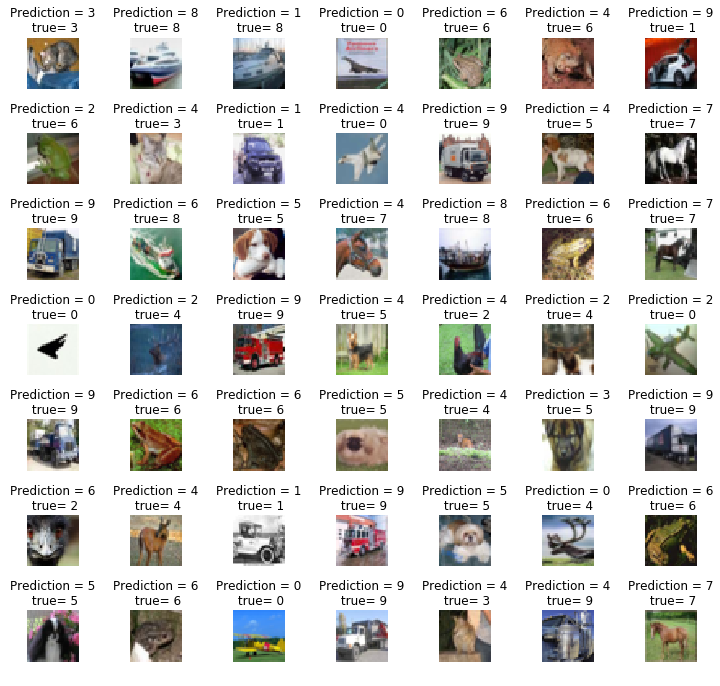

In [21]:
l = 7
w = 7
fig, axes = plt.subplots(l,w,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n true= {}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace =1)

## Confusion Matrix

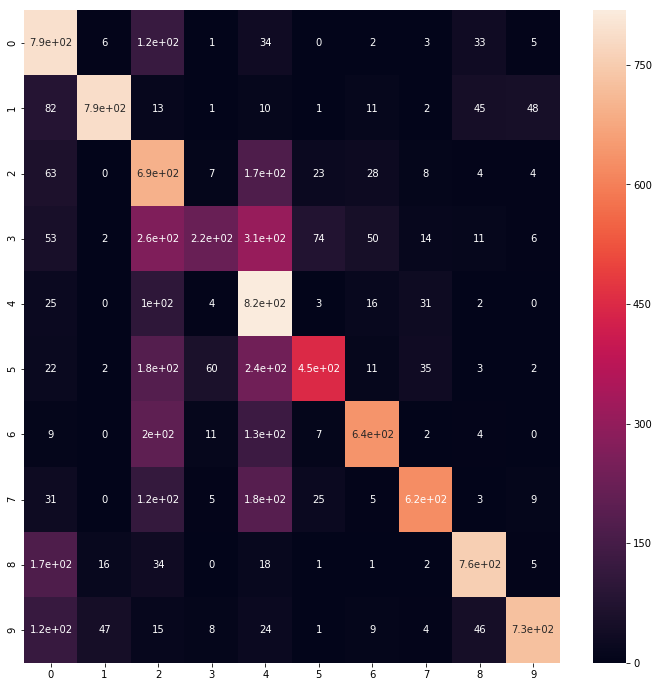

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot = True)
plt.show()

### Saving the Model

In [23]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models') 
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

## Improving the model using Data Augmentation

In [24]:
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(rotation_range=90,vertical_flip=True,brightness_range=(0,5))
datagen_train.fit(X_train)

In [25]:
cnn_model.fit_generator(datagen_train.flow(X_train, y_train, batch_size = 32),
                        steps_per_epoch = 1563, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 159s 102ms/step - loss: 14.5041 - acc: 0.1001
Epoch 2/50
1563/1563 [==============================] - 158s 101ms/step - loss: 14.4963 - acc: 0.1000
Epoch 3/50
1563/1563 [==============================] - 159s 101ms/step - loss: 12.7032 - acc: 0.1018
Epoch 4/50
1563/1563 [==============================] - 159s 102ms/step - loss: 2.3280 - acc: 0.0986
Epoch 5/50
1563/1563 [==============================] - 158s 101ms/step - loss: 2.3064 - acc: 0.0993
Epoch 6/50
1563/1563 [==============================] - 159s 102ms/step - loss: 2.3057 - acc: 0.0959
Epoch 7/50
1563/1563 [==============================] - 158s 101ms/step - loss: 2.3061 - acc: 0.0971
Epoch 8/50
1563/1563 [==============================] - 160s 102ms/step - loss: 2.3069 - acc: 0.0978
Epoch 9/50
1563/1563 [==============================] - 162s 104ms/step - loss: 2.3036 - acc: 0.0990s - loss: 2 - ETA: 1s - loss: 2.3036 - 
Epoch 10/50
1563/1563 [==========================

In [26]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models') 
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_Aug_model.h5')
cnn_model.save(model_path)

# Finally Completed